In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df_airlines = pd.read_csv('Airline_customer_satisfaction.csv')
df_airlines.head()


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
print("\nMissing values in each column:")
print(df_airlines.isnull().sum())

print("\nDataset info:")
print(df_airlines.info())


Missing values in each column:
satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Statistical Summary
num_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
print("\nNumerical columns summary:")

print(df_airlines[num_cols].describe())


Numerical columns summary:
       Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes
count    129880.000000               129880.000000             129487.000000
mean       1981.409055                   14.713713                 15.091129
std        1027.115606                   38.071126                 38.465650
min          50.000000                    0.000000                  0.000000
25%        1359.000000                    0.000000                  0.000000
50%        1925.000000                    0.000000                  0.000000
75%        2544.000000                   12.000000                 13.000000
max        6951.000000                 1592.000000               1584.000000


In [ ]:
#Age Categories
def categorize_age(age):
    if age <= 19:
        return 'Teen'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df_airlines['Age_Category'] = df_airlines['Age'].apply(categorize_age)
age_counts = df_airlines['Age_Category'].value_counts()
print("Age category distribution:")
print(age_counts)

Age category distribution:
Age_Category
Adult          68081
Young Adult    39565
Teen           12180
Senior         10054
Name: count, dtype: int64


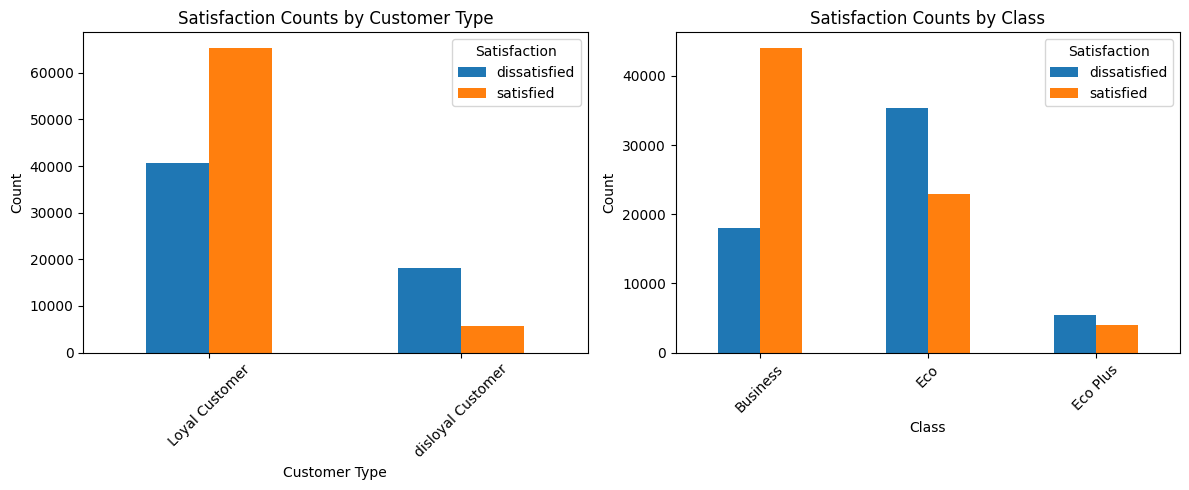

In [ ]:
#Satisfaction Analysis

plt.figure(figsize=(12, 5))

#Total Satisfaction by Customer Type
plt.subplot(1, 2, 1)
satisfaction_by_customer = df_airlines.groupby(['Customer Type', 'satisfaction']).size().unstack()
satisfaction_by_customer.plot(kind='bar', ax=plt.gca())
plt.title('Satisfaction Counts by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')

#Total Satisfaction by Customer Class
plt.subplot(1, 2, 2)
satisfaction_by_class = df_airlines.groupby(['Class', 'satisfaction']).size().unstack()
satisfaction_by_class.plot(kind='bar', ax=plt.gca())
plt.title('Satisfaction Counts by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')

plt.tight_layout()
plt.show()

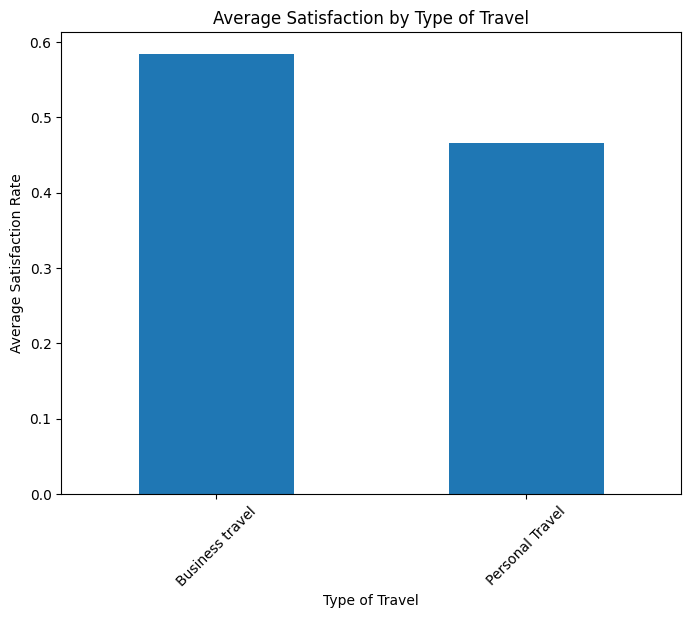

In [ ]:
#Average satisfaction by Type of Travel

#Converting satisfaction to numeric for calculation
df_airlines['satisfaction_numeric'] = df_airlines['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})
avg_satisfaction_travel = df_airlines.groupby('Type of Travel')['satisfaction_numeric'].mean()

plt.figure(figsize=(8, 6))
avg_satisfaction_travel.plot(kind='bar')
plt.title('Average Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Average Satisfaction Rate')
plt.xticks(rotation=45)
plt.show()

Correlation Matrix:
                                        Age  Flight Distance  Seat comfort  \
Age                                1.000000        -0.249625      0.008784   
Flight Distance                   -0.249625         1.000000     -0.042409   
Seat comfort                       0.008784        -0.042409      1.000000   
Departure/Arrival time convenient  0.039055         0.001350      0.434951   
Food and drink                     0.015749        -0.004649      0.715997   
Gate location                     -0.000547        -0.002409      0.405300   
Inflight wifi service              0.013965         0.012230      0.129131   
Inflight entertainment             0.130511        -0.027542      0.426447   
Online support                     0.121201        -0.032022      0.120278   
Ease of Online booking             0.071594        -0.022299      0.211531   
On-board service                   0.066704        -0.032559      0.121149   
Leg room service                   0.083762 

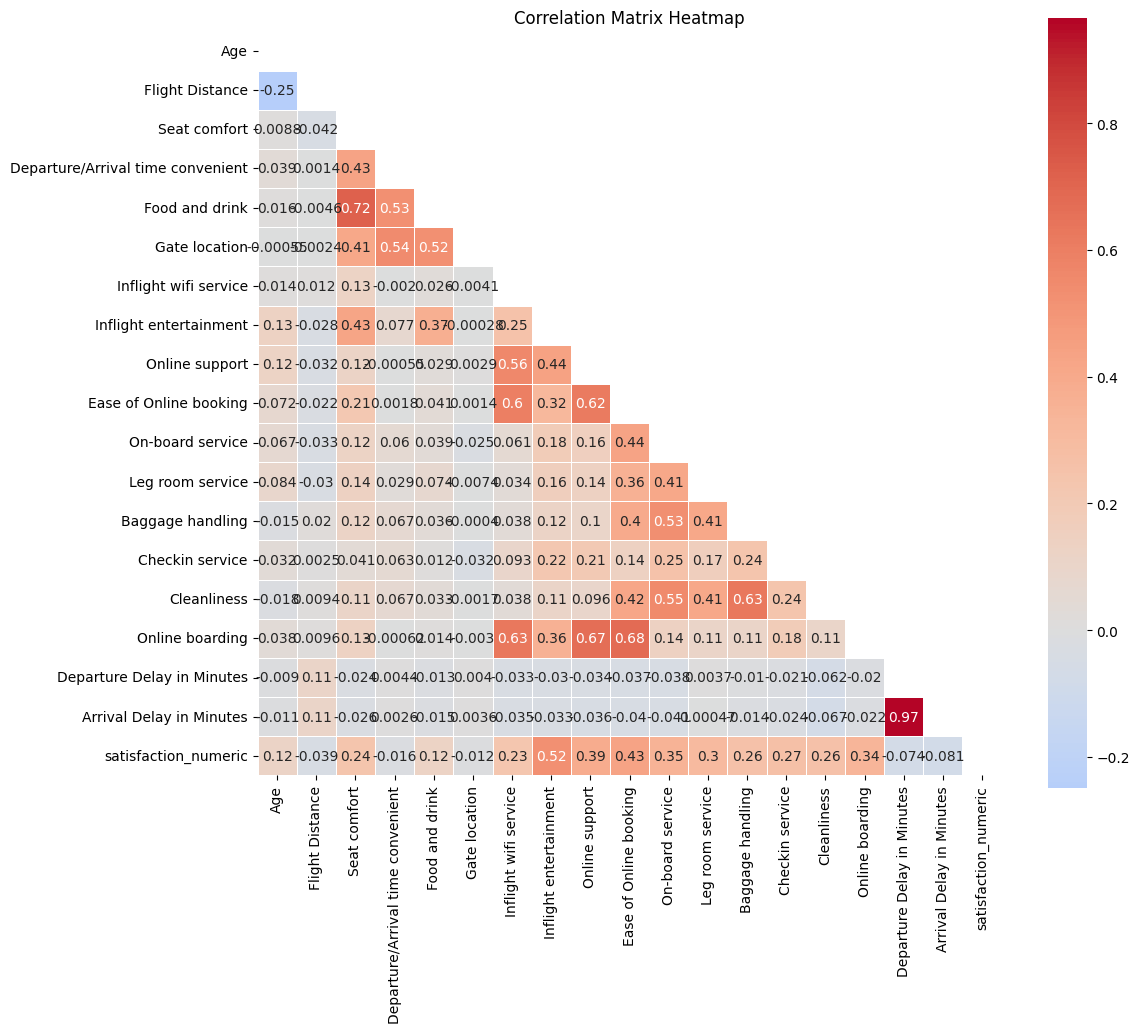

In [ ]:
#Correlation Analysis

numeric_columns = df_airlines.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_airlines[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

#Visualizing correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
#Highest and lowest correlations
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_pairs.append({
            'var1': correlation_matrix.columns[i],
            'var2': correlation_matrix.columns[j],
            'correlation': correlation_matrix.iloc[i, j]
        })

correlation_df = pd.DataFrame(correlation_pairs)
correlation_df = correlation_df.dropna()

print("Highest correlations:")
print(correlation_df.nlargest(5, 'correlation')[['var1', 'var2', 'correlation']])
print("\nLowest correlations:")
print(correlation_df.nsmallest(5, 'correlation')[['var1', 'var2', 'correlation']])

Highest correlations:
                           var1                      var2  correlation
168  Departure Delay in Minutes  Arrival Delay in Minutes     0.965291
36                 Seat comfort            Food and drink     0.715997
131      Ease of Online booking           Online boarding     0.684320
122              Online support           Online boarding     0.669843
151            Baggage handling               Cleanliness     0.631803

Lowest correlations:
                           var1                        var2  correlation
0                           Age             Flight Distance    -0.249625
170    Arrival Delay in Minutes        satisfaction_numeric    -0.080691
169  Departure Delay in Minutes        satisfaction_numeric    -0.073909
163                 Cleanliness    Arrival Delay in Minutes    -0.067208
162                 Cleanliness  Departure Delay in Minutes    -0.062134


In [ ]:
#Correlation between Flight Distance & Arrival Delay
print(f"\nCorrelation between Flight Distance and Arrival Delay: {df_airlines['Flight Distance'].corr(df_airlines['Arrival Delay in Minutes']):.4f}")
print(f"Correlation between Departure Delay and Arrival Delay: {df_airlines['Departure Delay in Minutes'].corr(df_airlines['Arrival Delay in Minutes']):.4f}")



Correlation between Flight Distance and Arrival Delay: 0.1101
Correlation between Departure Delay and Arrival Delay: 0.9653



Flight Distance - Mean: 1981.41, Std: 1027.12


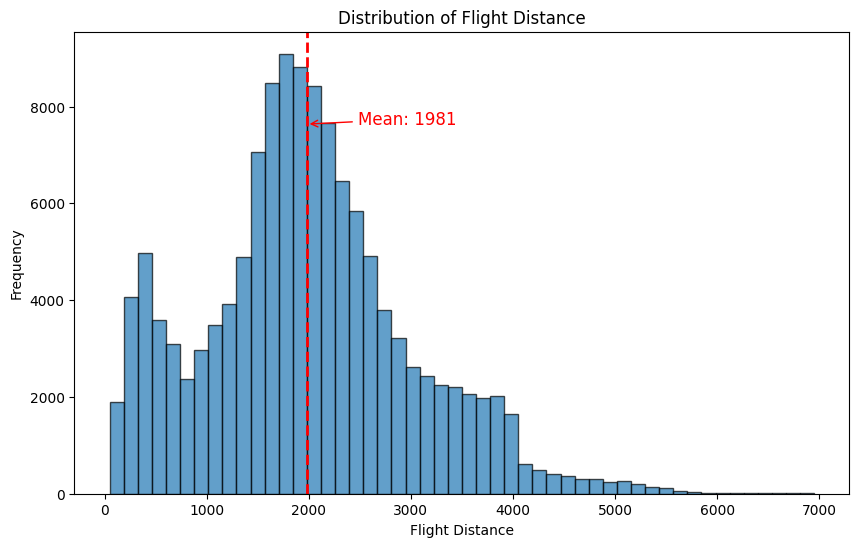

In [ ]:
#Flight Distance Analysis
plt.figure(figsize=(10, 6))

flight_distance_mean = df_airlines['Flight Distance'].mean()
flight_distance_std = df_airlines['Flight Distance'].std()
print(f"\nFlight Distance - Mean: {flight_distance_mean:.2f}, Std: {flight_distance_std:.2f}")

plt.hist(df_airlines['Flight Distance'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(flight_distance_mean, color='red', linestyle='--', linewidth=2)
plt.annotate(f'Mean: {flight_distance_mean:.0f}',
             xy=(flight_distance_mean, plt.ylim()[1]*0.8),
             xytext=(flight_distance_mean + 500, plt.ylim()[1]*0.8),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

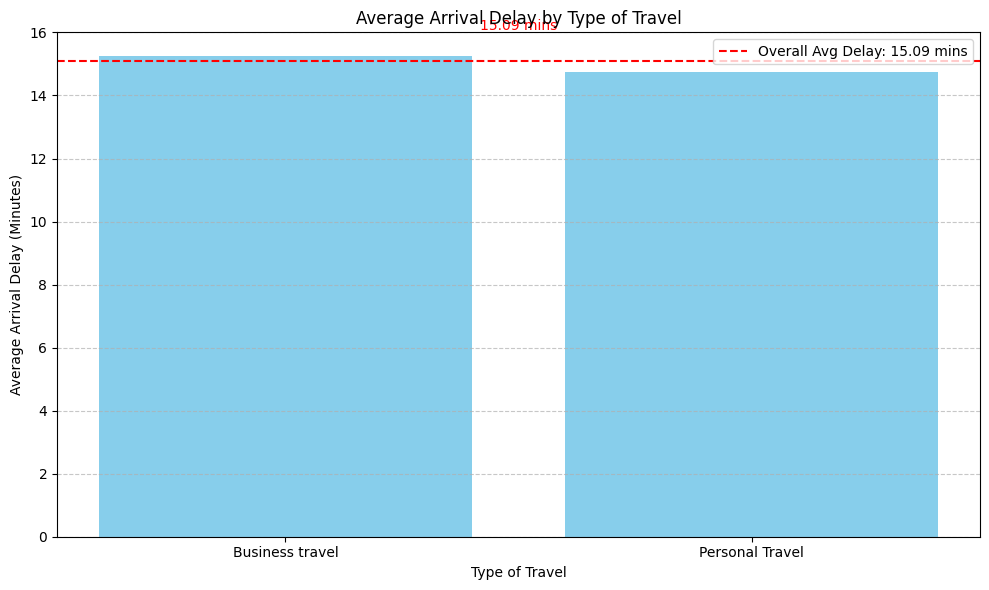

In [ ]:

df = pd.read_csv('Airline_customer_satisfaction.csv')

df_clean = df.dropna(subset=['Arrival Delay in Minutes', 'Type of Travel'])

avg_delay_by_travel = df_clean.groupby('Type of Travel')['Arrival Delay in Minutes'].mean()
overall_avg_delay = df_clean['Arrival Delay in Minutes'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_delay_by_travel.index, avg_delay_by_travel.values, color='skyblue')
plt.axhline(overall_avg_delay, color='red', linestyle='--', label=f'Overall Avg Delay: {overall_avg_delay:.2f} mins')

plt.text(0.5, overall_avg_delay + 1, f'{overall_avg_delay:.2f} mins', color='red', ha='center')

plt.title('Average Arrival Delay by Type of Travel')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.xlabel('Type of Travel')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


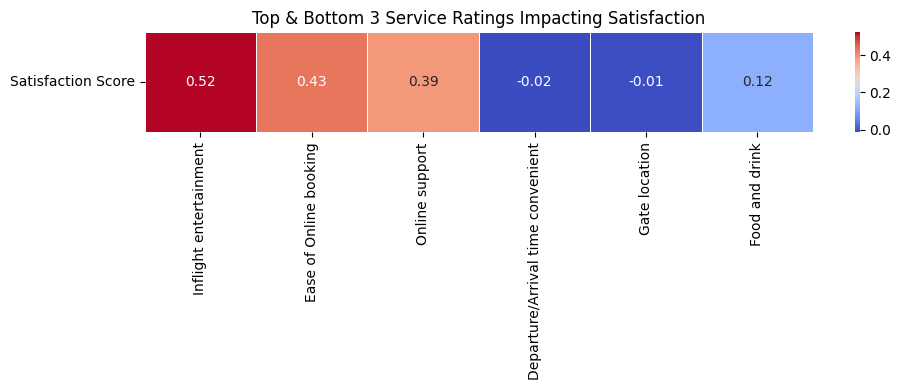

In [ ]:

service_columns = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
    'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
    'Cleanliness', 'Online boarding'
]

df_airlines['Satisfaction Score'] = df_airlines['satisfaction'].map(lambda x: 1 if x.strip().lower() == 'satisfied' else 0)
correlations = df_airlines[service_columns + ['Satisfaction Score']].corr()['Satisfaction Score'].drop('Satisfaction Score')

top_3 = correlations.sort_values(ascending=False).head(3)
bottom_3 = correlations.sort_values().head(3)

selected_features = top_3.index.tolist() + bottom_3.index.tolist()
selected_corrs = correlations[selected_features]

# Step 6: Plot heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(
    selected_corrs.to_frame().T,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5,
    fmt=".2f"
)

# Step 7: Customize heatmap
plt.title("Top & Bottom 3 Service Ratings Impacting Satisfaction")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


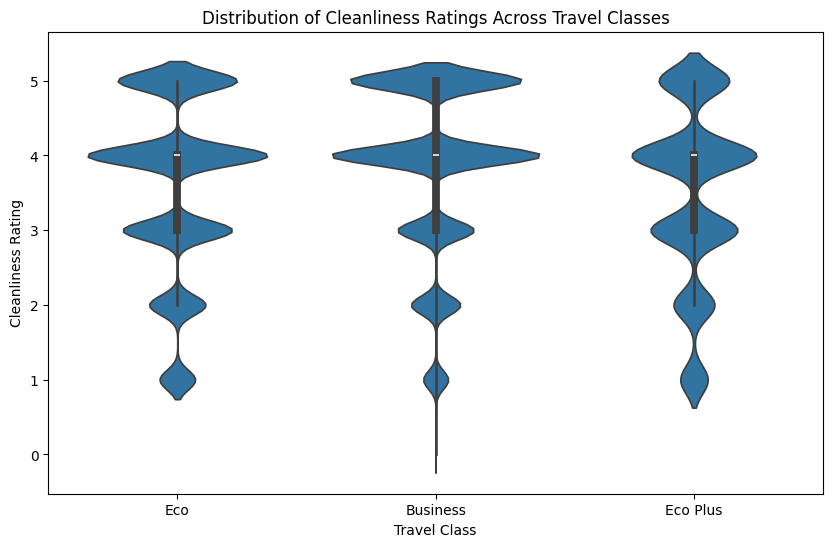

In [ ]:
#Customer Feedback Analysis
#Cleanliness Analysis
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_airlines, x='Class', y='Cleanliness')
plt.title('Distribution of Cleanliness Ratings Across Travel Classes')
plt.xlabel('Travel Class')
plt.ylabel('Cleanliness Rating')
plt.show()

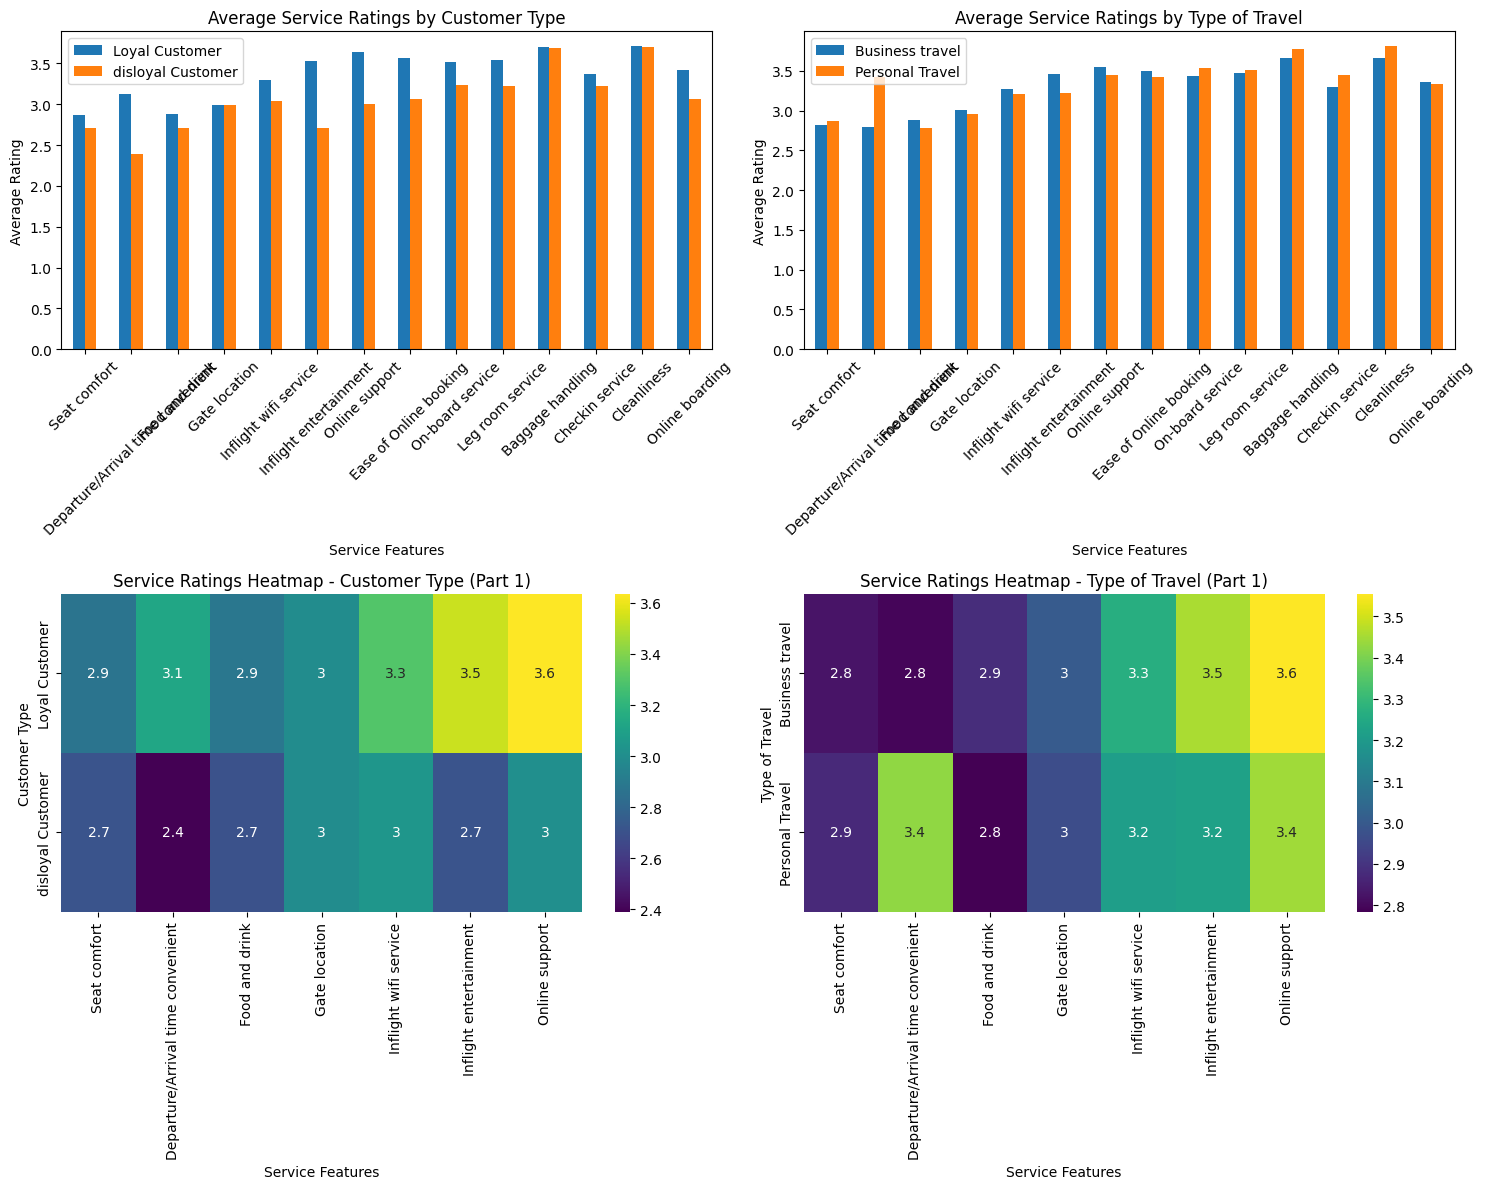

In [ ]:
# Service Feature Analysis across Customer Type and Type of Travel
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Service ratings by Customer Type
service_by_customer = df_airlines.groupby('Customer Type')[service_columns].mean()
service_by_customer.T.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Average Service Ratings by Customer Type')
axes[0,0].set_xlabel('Service Features')
axes[0,0].set_ylabel('Average Rating')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend()

# Service ratings by Type of Travel
service_by_travel = df_airlines.groupby('Type of Travel')[service_columns].mean()
service_by_travel.T.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Service Ratings by Type of Travel')
axes[0,1].set_xlabel('Service Features')
axes[0,1].set_ylabel('Average Rating')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend()


# Heatmap of service ratings by Customer Type
sns.heatmap(service_by_customer[service_columns[:7]], annot=True, cmap='viridis', ax=axes[1,0])
axes[1,0].set_title('Service Ratings Heatmap - Customer Type (Part 1)')
axes[1,0].set_xlabel('Service Features')

# Heatmap of service ratings by Type of Travel
sns.heatmap(service_by_travel[service_columns[:7]], annot=True, cmap='viridis', ax=axes[1,1])
axes[1,1].set_title('Service Ratings Heatmap - Type of Travel (Part 1)')
axes[1,1].set_xlabel('Service Features')

plt.tight_layout()
plt.show()

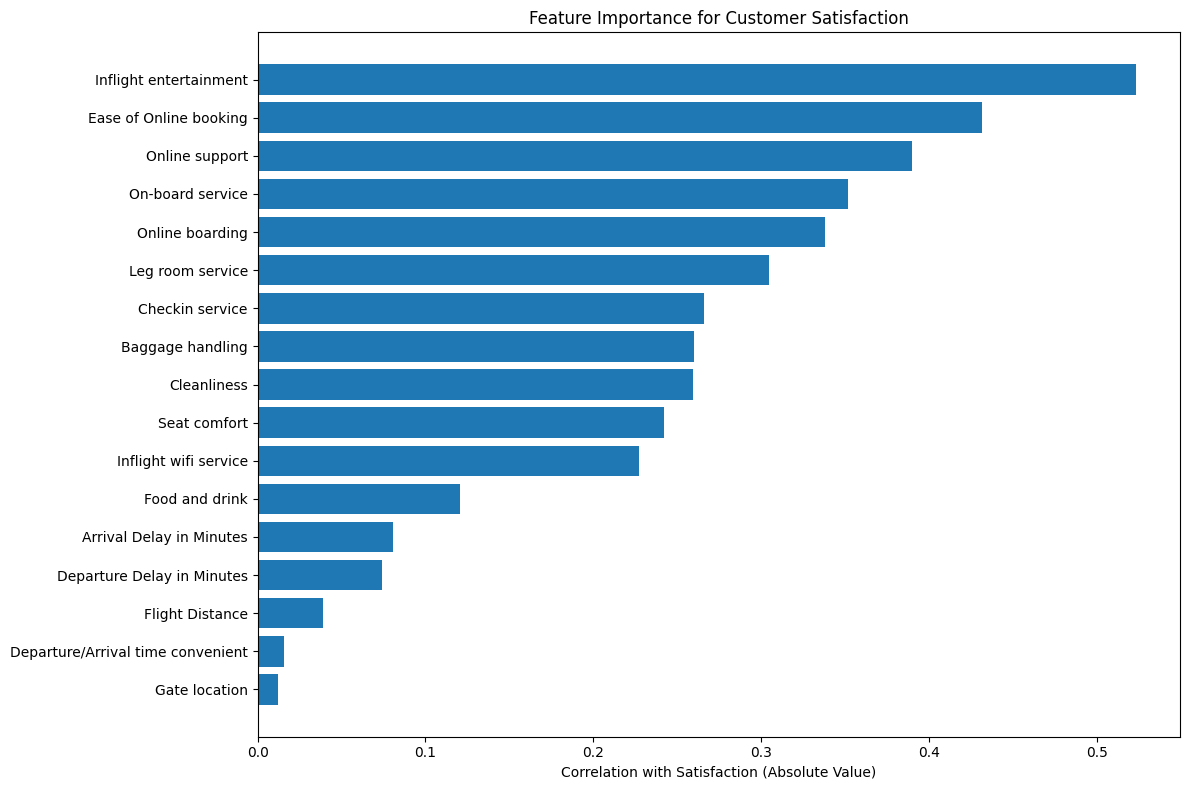

In [ ]:
#Overall Satisfaction Analysis

feature_columns = service_columns + ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Calculate correlations with satisfaction
feature_correlations = {}
for feature in feature_columns:
    corr = df_airlines[feature].corr(df_airlines['satisfaction_numeric'])
    feature_correlations[feature] = abs(corr)  # Use absolute value for importance

# Sort by importance
feature_importance = sorted(feature_correlations.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(12, 8))
features, importance = zip(*feature_importance)
plt.barh(range(len(features)), importance)
plt.yticks(range(len(features)), features)
plt.xlabel('Correlation with Satisfaction (Absolute Value)')
plt.title('Feature Importance for Customer Satisfaction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
#Customer Feedback Summary

# 1. CLEANLINESS ANALYSIS SUMMARY
print("\n1. CLEANLINESS BY CLASS:")
cleanliness_by_class = df_airlines.groupby('Class')['Cleanliness'].mean().round(2)
for class_type, rating in cleanliness_by_class.items():
    print(f"   {class_type}: {rating:.2f}/5")

# 2. SERVICE RATINGS SUMMARY
print("\n2. AVERAGE SERVICE RATINGS:")
print("   By Customer Type:")
service_by_customer = df_airlines.groupby('Customer Type')[service_columns].mean()
for customer_type in service_by_customer.index:
    avg_rating = service_by_customer.loc[customer_type].mean()
    print(f"   • {customer_type}: {avg_rating:.2f}/5")

print("   By Travel Type:")
service_by_travel = df_airlines.groupby('Type of Travel')[service_columns].mean()
for travel_type in service_by_travel.index:
    avg_rating = service_by_travel.loc[travel_type].mean()
    print(f"   • {travel_type}: {avg_rating:.2f}/5")

# 3. TOP SATISFACTION DRIVERS
print("\n3. TOP 5 SATISFACTION DRIVERS:")
for i, (feature, importance) in enumerate(feature_importance[:5], 1):
    print(f"   {i}. {feature}: {importance:.3f}")

# 4. SATISFACTION RATES BY SEGMENT
print("\n4. SATISFACTION RATES:")
overall_satisfaction = df_airlines['satisfaction_numeric'].mean()
print(f"   Overall: {overall_satisfaction:.1%}")

by_customer = df_airlines.groupby('Customer Type')['satisfaction_numeric'].mean()
for customer_type, rate in by_customer.items():
    print(f"   {customer_type}: {rate:.1%}")

by_travel = df_airlines.groupby('Type of Travel')['satisfaction_numeric'].mean()
for travel_type, rate in by_travel.items():
    print(f"   {travel_type}: {rate:.1%}")

print("\n" + "="*60)


1. CLEANLINESS BY CLASS:
   Business: 3.86/5
   Eco: 3.58/5
   Eco Plus: 3.48/5

2. AVERAGE SERVICE RATINGS:
   By Customer Type:
   • Loyal Customer: 3.37/5
   • disloyal Customer: 3.05/5
   By Travel Type:
   • Business travel: 3.30/5
   • Personal Travel: 3.34/5

3. TOP 5 SATISFACTION DRIVERS:
   1. Inflight entertainment: 0.523
   2. Ease of Online booking: 0.432
   3. Online support: 0.390
   4. On-board service: 0.352
   5. Online boarding: 0.338

4. SATISFACTION RATES:
   Overall: 54.7%
   Loyal Customer: 61.6%
   disloyal Customer: 24.0%
   Business travel: 58.4%
   Personal Travel: 46.6%



Report:

Basic EDA:

The dataset has129880rows and 23 columns.


The data types of each column are :
#   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object
 1   Customer Type                      129880 non-null  object
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object
 4   Class                              129880 non-null  object
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             129880 non-null  int64  
 12  Online support                     129880 non-null  int64  
 13  Ease of Online booking             129880 non-null  int64  
 14  On-board service                   129880 non-null  int64  
 15  Leg room service                   129880 non-null  int64  
 16  Baggage handling                   129880 non-null  int64  
 17  Checkin service                    129880 non-null  int64  
 18  Cleanliness                        129880 non-null  int64  
 19  Online boarding                    129880 non-null  int64  
 20  Departure Delay in Minutes         129880 non-null  int64  
 21  Arrival Delay in Minutes           129487 non-null  float64
-------------------------------------------
->Mean of the flight distances : 1981.409055
->SD of the flight distances: 1027.115606

->Range of Airval delay in minutes: 1584 Minutes

->There are 2 unique values in customer type: Loyal and Disloyal

Customers per category:
	Age_Category
Adult          68081
Young Adult    39565
Teen           12180
Senior         10054

## Visualisation and insights:

-> Loyal customers have the highest satisfaction counts

-> business class has the highest satisfaction.

-> Correlation between Flight Distance and Arrival Delay: 0.1101
Correlation between Departure Delay and Arrival Delay: 0.9653



## Deepen Analysis
-> Business travel has the highest average arrival time dealy

Top 3 services are Inflight entertainment, Ease of online booking, online support.
 While the bottom 3 are : departure and arrival time convenience, gate location, and food and drink.


## Feed back analysis:



Insights: Business class shows high and consistent good ratings while eco class have more variability . Outliers are there in all classes.

-> Average rating given by loyal customers are higher that the disloyal and the ratings given for personal travel is higher
